In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install matplotlib

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'DataSet',
    batch_size= BATCH_SIZE,
    image_size= (IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
)

Found 885 files belonging to 8 classes.


In [7]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

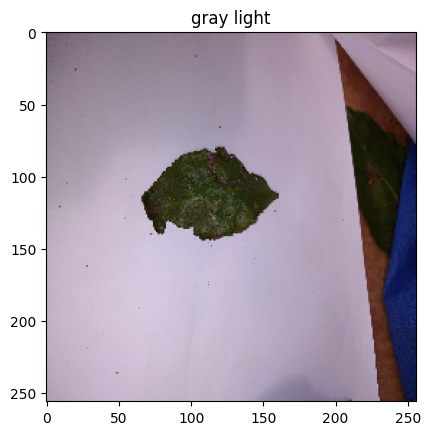

In [8]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(class_names[label_batch[0]])

In [9]:
train_size = 0.8
len(dataset)*train_size
# going to use 22 samples for training

22.400000000000002

In [10]:
train_ds = dataset.take(22)
len(train_ds)

22

In [11]:
test_ds = dataset.skip(22)
len(test_ds)

6

In [12]:
val_size = 0.1
len(dataset)*val_size

2.8000000000000003

In [13]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [14]:
test_ds = test_ds.skip(2)
len(test_ds)

4

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

22

In [18]:
len(val_ds)

2

In [19]:
len(test_ds)

4

In [20]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [22]:
# resize_and_rescale = Sequential([
#     layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # No 'experimental' prefix needed
#     layers.Rescaling(1.0/255),  # No 'experimental' prefix needed
# ])

In [23]:
# data_augmentation = Sequential([
#     layers.RandomFlip('horizontal_and_vertical'),
#     layers.RandomRotation(0.2),
# ])

In [24]:
from keras import layers, models

# Define constants
IMAGE_SIZE = 256  # Example size; change as needed
CHANNELS = 3  # Change according to your data
n_classes = 8

# Input layer
inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Preprocessing layers
resize_and_rescale = layers.Resizing(IMAGE_SIZE, IMAGE_SIZE)(inputs)
resize_and_rescale = layers.Rescaling(1.0/255)(resize_and_rescale)

data_augmentation = layers.RandomFlip('horizontal_and_vertical')(resize_and_rescale)
data_augmentation = layers.RandomRotation(0.2)(data_augmentation)

# Model architecture
x = layers.Conv2D(32, (3, 3), activation='relu')(data_augmentation)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

# Create the model
model = models.Model(inputs, outputs)

# Display the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,072 (719.03 KB)

 Trainable params: 184,072 (719.03 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.4115 - loss: 1.1842 - val_accuracy: 0.4531 - val_loss: 1.0789
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.5039 - loss: 1.0642 - val_accuracy: 0.4844 - val_loss: 1.0362
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5273 - loss: 1.0510 - val_accuracy: 0.5781 - val_loss: 1.1076
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.5667 - loss: 0.9688 - val_accuracy: 0.5000 - val_loss: 1.0636
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5408 - loss: 0.9945 - val_accuracy: 0.5938 - val_loss: 0.9466
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.5656 - loss: 0.9355 - val_accuracy: 0.6094 - val_loss: 0.8109
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.5951 - loss: 0.9411 - val_accuracy: 0.5156 - val_loss: 0.9784
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.5762 - loss: 0.9495 - val_accuracy: 0.5472 - val_loss

In [28]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 420ms/step - accuracy: 0.7063 - loss: 0.7265


In [29]:
scores

[0.7692466378211975, 0.6666666865348816]

In [32]:
import os
# model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/acc_70_updated") 

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=models/acc_70_updated.